Selected 22 important features (importance > 0.01)


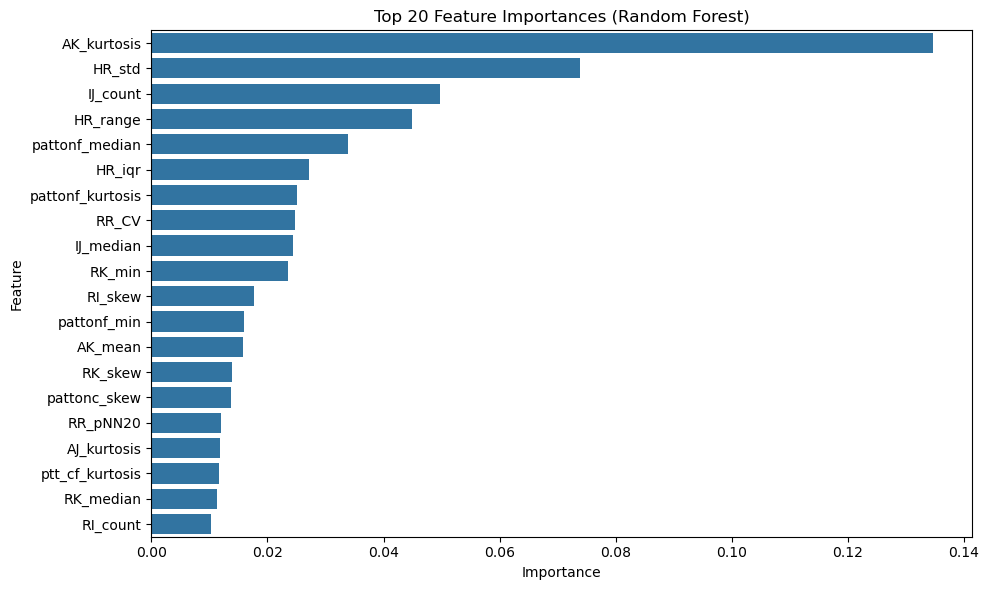

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
df = pd.read_csv("merged_patient_features_1_to_87.csv")

# Drop irrelevant columns manually
X = df.drop(columns=['patient_id', 'Age', 'Gender'])  # keep only numeric features
y = df['Age']

# Train a basic Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Compute feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame of importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Select only important features (e.g., > 0.01)
threshold = 0.01
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

print(f"Selected {len(important_features)} important features (importance > {threshold})")

# Create a reduced dataset
df_reduced = df[important_features + ['Age']]  # keep target column for modeling

# (Optional) Save to CSV
df_reduced.to_csv("reduced_features_dataset.csv", index=False)

# Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [3]:
df_reduced.to_csv("reduced_features_dataset.csv", index=False)